In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

Reading data, feature scaling

In [107]:
train_data = pd.read_csv("data.csv")
features = ["radius_mean", "texture_mean", "perimeter_mean", "area_mean"]
X_train = train_data[features].to_numpy()
X_train = X_train.T
rows = len(train_data.axes[0])
cols = 4
n = cols
m = rows

for i in range(cols):
    cmin = X_train[i].min()
    cmax = X_train[i].max()
    cmean = X_train[i].sum()/m
    
    X_train[i] = (X_train[i] - cmean)/(cmax-cmin)
X_train = X_train.T

Y_train = train_data["diagnosis"].replace(['M', 'B'], [1, 0]).to_numpy()

All the functions.

In [113]:
def f_wb(Xi, w, b):
    """Returns the sigmoid function value

    Args:
        X (np.array): Input data
        w (np.array): w vector
        b (Number): b parameter
    """
    value = 1/(1+np.exp(-(np.dot(w, Xi)+b)))
    return value

def cost_func(X, Y, w, b):
    """Returns cost function for particular w and b

    Args:
        X (np.array): Inputs
        Y (np.array): Actual outputs
        w (np.array): w vector
        b (Number): b parameter
    """
    cost = 0
    for i in range(m):
        loss = -Y[i]*np.log(f_wb(X[i], w, b))-(1-Y[i])*np.log(1-f_wb(X[i], w, b))
        cost += loss
    cost = cost/m
    
    return cost

def compute_gradient(X, Y, w, b):
    """Computes the gradient of cost function at w and b

    Args:
        x (np.array): Training inputs
        y (np.array): Training oupts (Correct answers)
        w (np.array): w vector
        b (Number): b parameter

    Returns:
        np.array, Number: dj_dw and dj_db
    """   
    dj_dw = np.zeros(n)
    dj_db = 0
    for j in range(n):
        t = 0
        for i in range(m):
            f = f_wb(X[i], w, b)
            er = f - Y[i]
            t += er*X[i][j]
            if(j == 0):
                dj_db += er
        dj_dw[j] = t/m
    dj_db = dj_db/m
          
    return dj_dw, dj_db

def GD_algorithm(X, Y, alpha):
    """Calculates the best fit for the model f_w,b(X) = 1/(1+np.exp(-(w*x+b))) for the given data and learning rate

    Args:
        x (np.array): Inputs of training data
        y (np.array): Correct key of output data
        alpha (Number): Learning Rate

    Returns:
        w, b, J_history: Parameters and Cost function history for Learning Curve
    """   
    J_history = []
    w = np.zeros(n)
    b = 0.0
    prev_J = cost_func(X, Y, w, b)
    iterations = 0
    p_diff = 0
    
    while(True):
        iterations += 1
        dj_dw, dj_db = compute_gradient(X, Y, w, b)
        w = w - alpha*dj_dw
        b = b - alpha*dj_db
        curr_J = cost_func(X, Y, w, b)
        
        J_history.append(curr_J)
        # print(f"J: {curr_J} alpha: {alpha}")
        # My idea of variable alpha
        if(curr_J > prev_J):
            alpha = alpha**0.9
            # break
        elif(p_diff < 10*(prev_J-curr_J)):
            alpha = alpha**1.001
        elif(prev_J-curr_J < 0.000001):
            return w, b, J_history, iterations
        
        p_diff = prev_J-curr_J
        prev_J = curr_J
        
def predict(X, w, b):
    """Predicts the data based on the input parameters

    Args:
        x (np.array): Inputs
        w (np.array): w vector
        b (Number): b parameter

    Returns:
        np.array: Predictions
    """
    Y_pred = []   
    m = len(X)
    
    for i in range(m):
        f_val = f_wb(X[i], w, b)
        if(f_val >= 0.5):
            Y_pred.append(1)
        else:
            Y_pred.append(0)
        
    return Y_pred

def accuracy(Y_act, Y_pred):
    
    m = len(Y_act)
    cor = 0
    
    for i in range(m):
        if(Y_act[i] == Y_pred[i]):
            cor += 1
    ac = cor/m
    
    return ac

Training the model.

J: 0.6234408157810195 alpha: 10
J: 0.5672768683586932 alpha: 10.023052380778994
J: 0.5506012154347462 alpha: 10.046181034944007
J: 0.4843233411432052 alpha: 10.069386268319404
J: 0.46143763472362986 alpha: 10.092668388149193
J: 0.408722228023755 alpha: 10.116027703104447
J: 0.3861556920345926 alpha: 10.139464523290753
J: 0.36101634705035124 alpha: 10.162979160255727
J: 0.34718794532047825 alpha: 10.186571926996548
J: 0.33611223967786436 alpha: 10.210243137967552
J: 0.3282827474126722 alpha: 10.233993109087866
J: 0.32193150615469784 alpha: 10.25782215774908
J: 0.3166020424106031 alpha: 10.281730602822975
J: 0.31194267033751466 alpha: 10.305718764669285
J: 0.30779603908660386 alpha: 10.329786965143509
J: 0.3040661310342997 alpha: 10.353935527604765
J: 0.3006889458994626 alpha: 10.3781647769237
J: 0.2976157110652296 alpha: 10.402475039490431
J: 0.2948071501300759 alpha: 10.426866643222537
J: 0.2922307312672497 alpha: 10.451339917573106
J: 0.28985915223154113 alpha: 10.475895193538822
J: 0

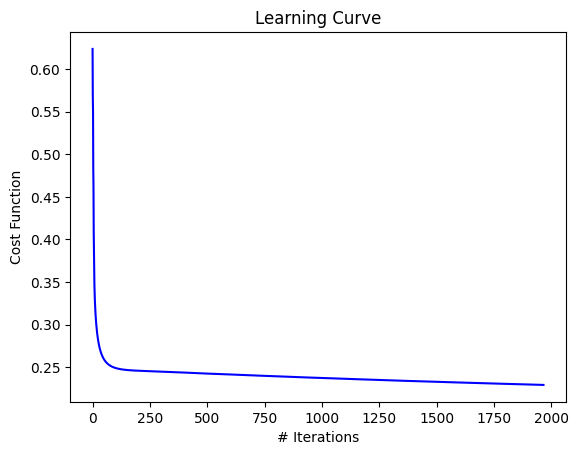

In [114]:
alpha = 10
w, b, J_history, it = GD_algorithm(X_train, Y_train, alpha)

# Plotting Learning Curve
indices = range(it)
plt.plot(indices, J_history, c='b')
plt.xlabel("# Iterations")
plt.ylabel("Cost Function")
plt.title("Learning Curve")
plt.show()

Testing the accuracy.

In [115]:
Y_pred = predict(X_train, w, b)

print(f"Accuracy of this model is {accuracy(Y_train, Y_pred)}")

Accuracy of this model is 0.9015817223198594
